# In this notebook, I discuss sales prediction. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

I used House Sales in King County, USA dataset on Kaggle. You can access here: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction 

In [2]:
df = pd.read_csv('kc_house_data.csv')

#### Let's take a look at this data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Overview 
- This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
- There are 21 columns and 21613 rows
- No Nan values. 
- The definition of each column:
    - id - Unique ID for each home sold
    - date - Date of the home sale
    - price - Price of each home sold
    - bedrooms - Number of bedrooms
    - bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
    - sqft_living - Square footage of the apartments interior living space
    - sqft_lot - Square footage of the land space
    - floors - Number of floors
    - waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
    - view - An index from 0 to 4 of how good the view of the property was
    - condition - An index from 1 to 5 on the condition of the apartment,
    - grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
    - sqft_above - The square footage of the interior housing space that is above ground level
    - sqft_basement - The square footage of the interior housing space that is below ground level
    - yr_built - The year the house was initially built
    - yr_renovated - The year of the house’s last renovation
    - zipcode - What zipcode area the house is in
    - lat - Lattitude
    - long - Longitude
    - sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    - sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#### As mentioned above, "id" and "date" columns seem unimportant.  Let's drop the "id" and "date" columns as these 2 features will not be used in this analysis.

In [6]:
df = df.drop(['id', 'date'], axis = 1)

## Visualizing and Examining Data

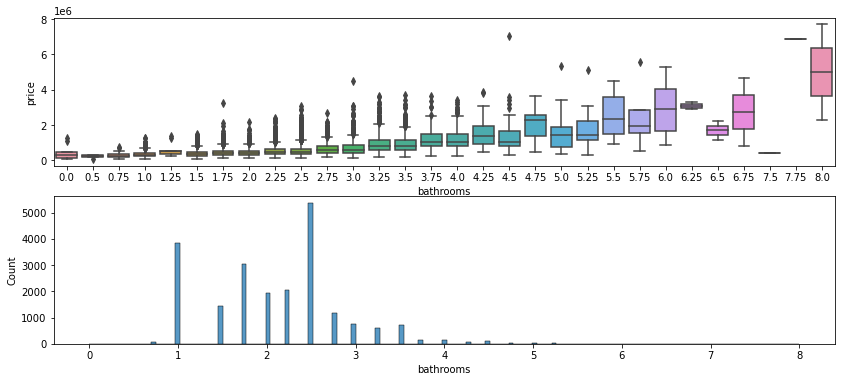

In [7]:
fig, (ax0, ax1)= plt.subplots(nrows = 2, figsize=(14,6))
sns.boxplot(x = 'bathrooms', y = 'price', data = df, ax = ax0);
sns.histplot(df['bathrooms'], ax = ax1);

2 charts above show that bathrooms have effect on price. 

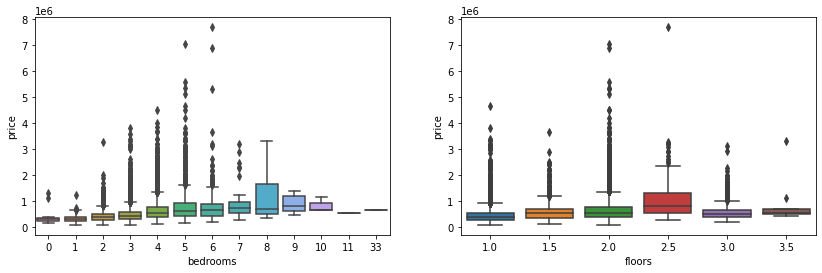

In [8]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(14,4))
sns.boxplot(x = 'bedrooms', y = 'price', data = df, ax = ax0)
sns.boxplot(x = 'floors', y = 'price', data = df, ax = ax1);

From the above charts, it can be seen that there are very few houses which have some features or price appears far from others like 33 bedrooms or price around 7000000. However, determining their possible negative effect will be time consuming and maybe those outliters are some kinda luxury house, penthouse or etc. That's why I am not planning to remove outliers.

Let's visualize some more features. Have a look at these 3 boxplots, we can clearly see how waterfront and grade affect price. On the other hand, view seems to effect less but it still does have an effect on price. 

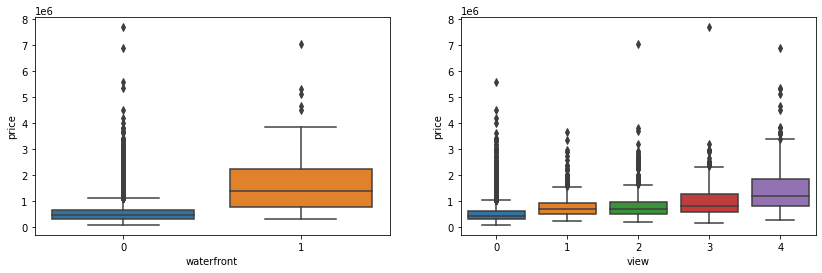

In [9]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(14,4))
sns.boxplot(x = 'waterfront', y = 'price', data = df, ax = ax0)
sns.boxplot(x = 'view', y = 'price', data = df, ax = ax1);

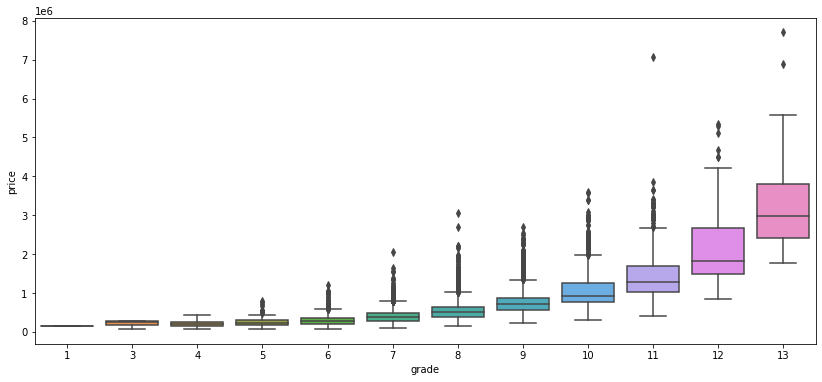

In [10]:
fig = plt.figure(figsize =(14, 6))
sns.boxplot(x = 'grade', y = 'price', data = df);

#### what about the relationship among each other?

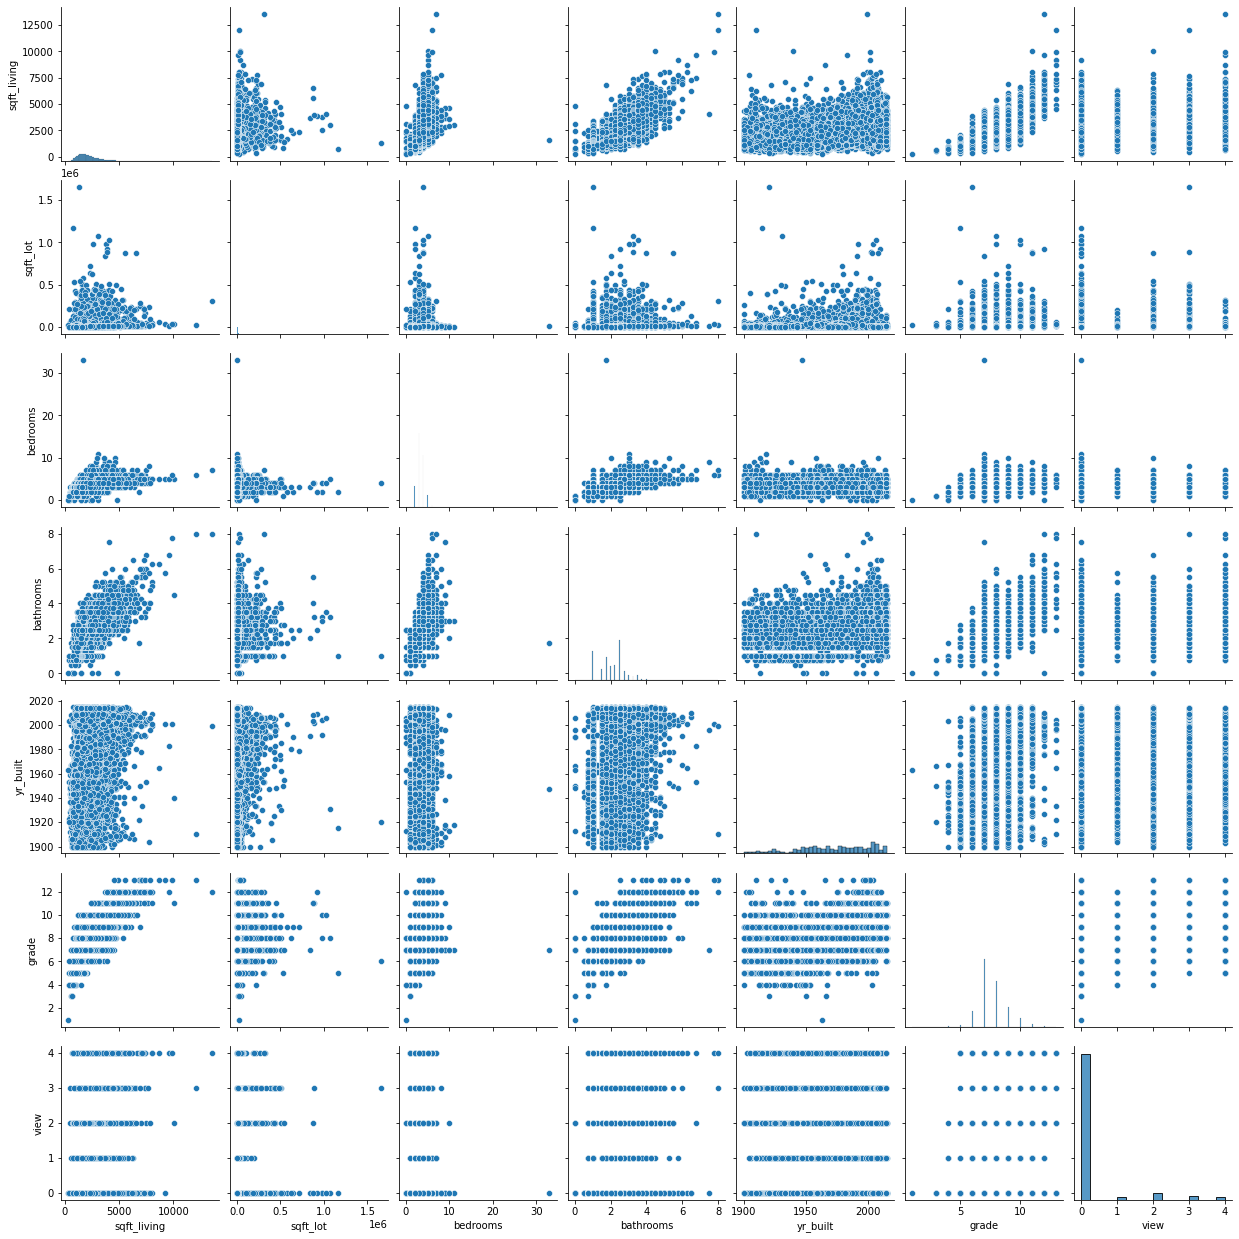

In [11]:
sns.pairplot(df[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'yr_built', 'grade', 'view']])
plt.show()

- When the sqft_living increases, sqft_lot and bedrooms or bathrooms increases. However, the floors, bedrooms and bathrooms or sqft_living does not have a similar relationship.
- The newer houses may have better grades but we can not say much about the change in the view.

#### Pearson Correlation
To understand the correlation between features

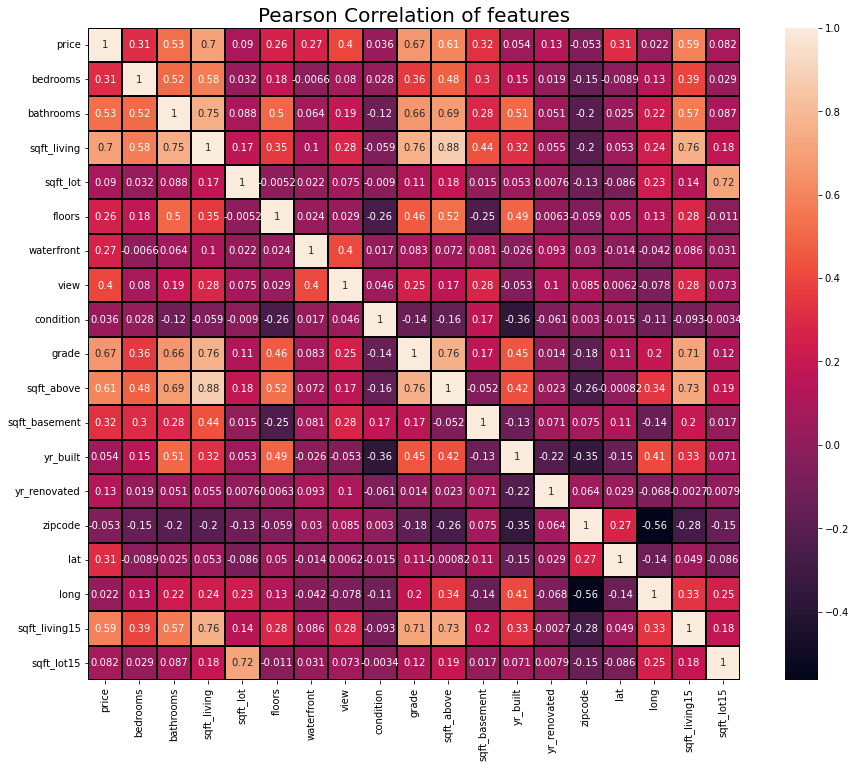

In [12]:
str_list = [] 
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)         
num_list = df.columns.difference(str_list) 
house_num = df[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features', fontsize = 20)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='k', annot=True);

Having too many features in a model is not always a good thing because it might cause overfitting and worser results when we want to predict values for a new dataset. Thus, if a feature does not improve your model a lot, not adding it may be a better choice.\
Another important thing is correlation. If there is very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting. For instance, if there is overfitting, we may remove sqft_above or sqft_living because they are highly correlated. Bathrooms and sqft_living are highly correlated but I do not think that the relation among them is the same as the relation between sqft_living and sqft_above.

#### I decided to drop these columns sqft_above, sqft_living15, sqft_lot15

In [13]:
df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)

## Features Selection

I will using Feature Ranking Matrix to solve features selection problems.
- Idea: Anisotropic on Kaggle and from this blog: http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/

### Recursive Feature Elimination ( RFE )

In [14]:
house = df
Y = house.price.values
house = house.drop(['price'], axis=1)
X = house.values
colnames = house.columns

In [15]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [16]:
lr = LinearRegression()
lr.fit(X,Y)
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [17]:
# Using Linear Regression
lr = LinearRegression()
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

### Random Forest feature ranking

In [18]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50
building tree 4 of 50
building tree 5 of 50


building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50building tree 12 of 50

building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50building tree 24 of 50



[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


### Creating the Feature Ranking Matrix

In [19]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	Mean
bedrooms	0.06	0.06	0.01	0.5	0.06	0.14
bathrooms	0.07	0.07	0.02	0.64	0.07	0.17
sqft_living	0.0	0.0	0.89	0.21	0.0	0.22
sqft_lot	0.0	0.0	0.07	0.0	0.0	0.01
floors	0.01	0.01	0.0	0.36	0.01	0.08
waterfront	0.95	0.95	0.09	1.0	0.93	0.78
view	0.09	0.09	0.04	0.71	0.09	0.2
condition	0.04	0.04	0.0	0.57	0.04	0.14
grade	0.16	0.16	1.0	0.86	0.17	0.47
sqft_basement	0.0	0.0	0.02	0.14	0.0	0.03
yr_built	0.0	0.0	0.08	0.43	0.0	0.1
yr_renovated	0.0	0.0	0.0	0.07	0.0	0.01
zipcode	0.0	0.0	0.05	0.29	0.0	0.07
lat	1.0	1.0	0.52	0.93	1.0	0.89
long	0.34	0.34	0.22	0.79	0.34	0.41


In [20]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

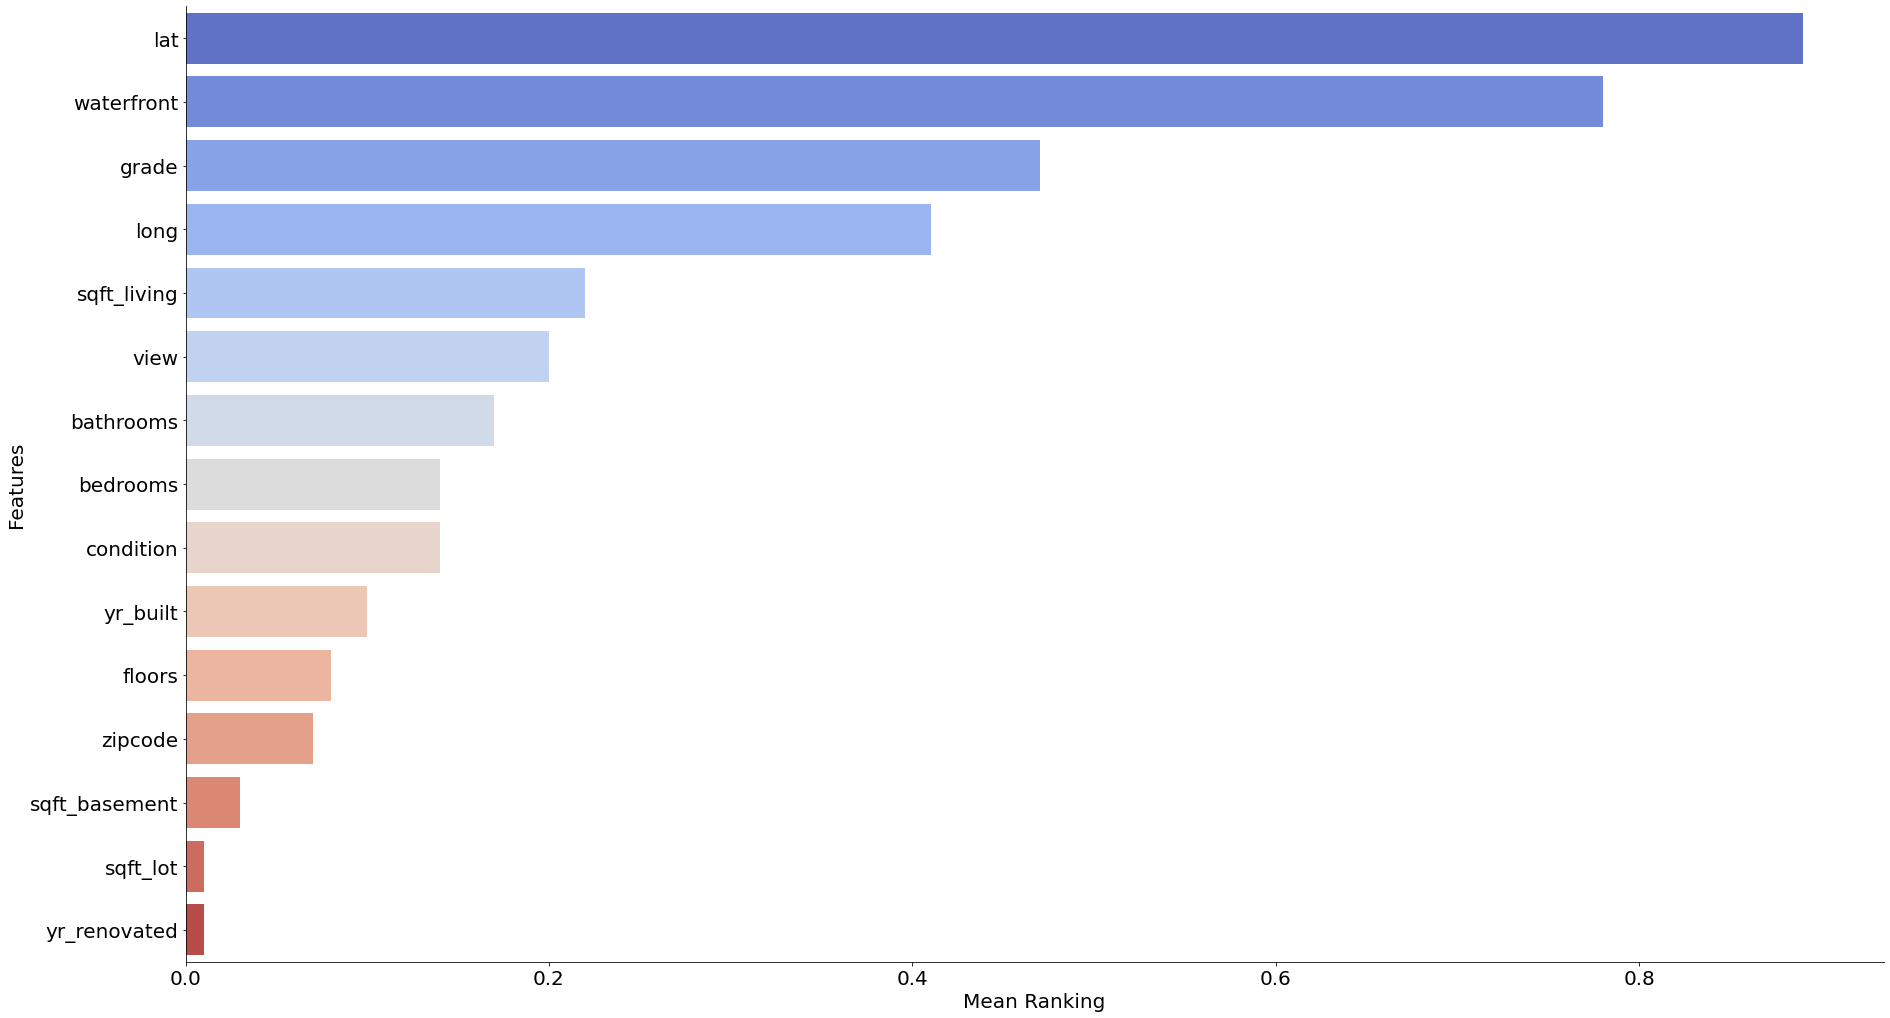

In [21]:
# Let's plot the ranking of the features
sns.catplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               height=14, aspect=1.8, palette='coolwarm')
plt.xlabel("Mean Ranking", fontsize=20)  
plt.ylabel("Features", fontsize=20)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20)
plt.show()

#### So we gonna take 'lat', 'waterfront', 'grade', 'long', 'sqft_living', 'view', 'bathrooms' for input data to the model. 

## Models and Evaluation

#### Here I used cross validation with 5 folds. With evaluating model, I used RMSE score.
- Split the data: The initial data set is divided into two parts: training set and testing set. The training set is used to train the model, and the test set is used to test the model.

- Divide into folds: The training set is divided into smaller parts called "folds". The number of folds is usually predetermined. For example, 5-fold cross-validation will divide the training set into 5 folds.

- Iterate through folds: Proceed to iterate through folds in a loop. In each iteration, one fold will be used as the test set, while the remaining folds will be used as the training set. This means that the model will be trained and tested 5 times in case of 5-fold cross-validation.

- Performance evaluation: In each iteration, the model will be tested on the test fold, and its performance (accuracy, MSE, RMSE, ...) will be recorded.

- Calculating results: After completing all iterations, the performance results from the test folds are aggregated to calculate the average or any other statistics. This provides a more faithful estimate of the model's performance on unseen data.

- Overview: Finally, get an overview of model's performance using the average or other statistics from the iterations.

### Modeling

In [22]:
X = df.filter(['lat', 'long', 'waterfront', 'grade', 'sqft_living', 'view', 'bathrooms'])
y = df['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()

lr_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lr_rmse_scores = (-lr_scores)**0.5  # Điểm số là giá trị MSE, chuyển đổi thành RMSE

print("Cross-Validation Scores for Linear Regression:")
print(lr_rmse_scores)
print("Mean RMSE:", lr_rmse_scores.mean())

Cross-Validation Scores for Linear Regression:
[235135.36599444 217221.1390605  205032.10172318 198112.98882155
 198219.53314168]
Mean RMSE: 210744.22574826953


In [24]:
rf_model = RandomForestRegressor(random_state=42)

rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = (-rf_scores)**0.5  # Điểm số là giá trị MSE, chuyển đổi thành RMSE

print("\nCross-Validation Scores for Random Forest Regression:")
print(rf_rmse_scores)
print("Mean RMSE:", rf_rmse_scores.mean())

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("\nRoot Mean Squared Error on Test Data (Random Forest):", test_rmse)


Cross-Validation Scores for Random Forest Regression:
[144297.02309451 129899.45010135 126714.39715142 125337.55413063
 123868.0805421 ]
Mean RMSE: 130023.30100400155

Root Mean Squared Error on Test Data (Random Forest): 146407.46184038432


Linear Regression - R2 Score: 0.6659786193158368
Linear Regression - MAE: 137151.47493404328
Linear Regression - MSE: 50496254155.32769


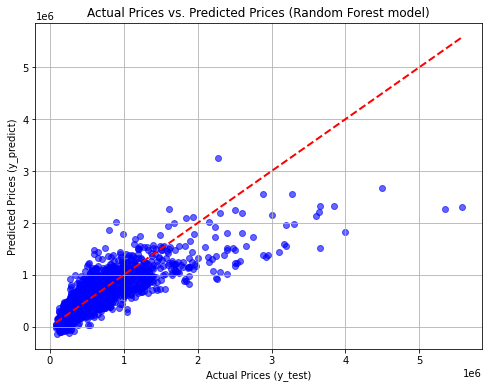

In [25]:
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Linear Regression - R2 Score:", r2_lr)
print("Linear Regression - MAE:", mae_lr)
print("Linear Regression - MSE:", mse_lr)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, c='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Prices (y_test)')
plt.ylabel('Predicted Prices (y_predict)')
plt.title('Actual Prices vs. Predicted Prices (Random Forest model)')
plt.grid(True)
plt.show()


Random Forest Regression - R2 Score: 0.8582113305512014
Random Forest Regression - MAE: 75378.08631133309
Random Forest Regression - MSE: 21435144882.543594


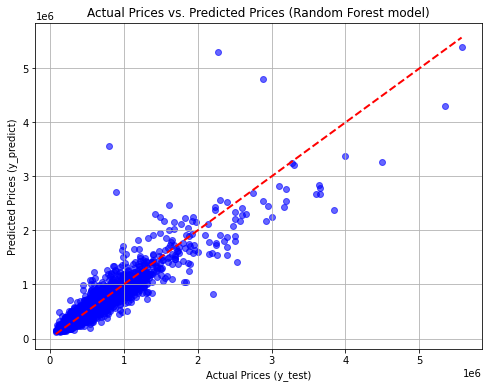

In [26]:
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("\nRandom Forest Regression - R2 Score:", r2_rf)
print("Random Forest Regression - MAE:", mae_rf)
print("Random Forest Regression - MSE:", mse_rf)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, c='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Prices (y_test)')
plt.ylabel('Predicted Prices (y_predict)')
plt.title('Actual Prices vs. Predicted Prices (Random Forest model)')
plt.grid(True)
plt.show()

### Evaluating

- The Random Forest Regression model has better performance than Linear Regression on House Sales in King County's data. Random Forest's average RMSE value is much lower than that of Linear Regression (130,023 vs. 210,744) or R2 score (0.66 vs. 0.85).

- The RMSE value on Random Forest's test set is 146,407.46, indicating pretty good predictability on the test set.

- Based on these results, the Random Forest Regression model may be a better choice for predicting home prices on "House Sales in King County" data.

## Testing

I will use my Random Forest model to predict the new data point. I have found a house in King County - 11110 NE 41st Dr. You can access here for more information: https://www.redfin.com/WA/Kirkland/11110-NE-41st-Dr-98033/unit-40/home/63360.

These are the indicators I found about this house:
- lat: 47.646389 - I use this website to help me find the lat and long of this house: https://www.latlong.net/
- long: -122.193817
- waterfront: 1
- grade: 10 or 11. I evaluated it myself
- sqft_living: 1852
- view: 4
- bathrooms: 2

Let's test it on our model

In [27]:
new_data = pd.DataFrame({
    'lat': [47.646389],
    'long': [-122.193817],
    'waterfront': [1],
    'grade': [10],
    'sqft_living': [1852],
    'view': [4],
    'bathrooms': [2]
})
predicted_price = rf_model.predict(new_data)
print("Predicted Price: $" + str(predicted_price[0]))

Predicted Price: $1236787.7


$1,280,000 is the sale price of this house on Sep 15, 2023 based on the website I mentioned above. It can be said that the price predicted on the model is quite accurate, but there are factors that have not been taken into account, such as inflation and this Random Forest model based on data collection in 2014-2015. 

## Conclusion
In this notebook, we embarked on a comprehensive analysis of house sales in King County. Through data exploration, preprocessing, feature selection, and predictive modeling, we gained valuable insights into the factors influencing house prices in this region. Here are the key takeaways from our analysis:

1. Data Exploration: I began by exploring the dataset, gaining an understanding of its structure and distribution. I visualized the data using various plots and charts to identify patterns and outliers.

2. Feature Selection: I identified important features that significantly impact house prices. Factors such as square footage, the number of bedrooms and bathrooms, and the grade of the house were found to be crucial determinants.

3. Predictive Modeling: I built predictive models, including Linear Regression and Random Forest Regression, to estimate house prices. I employed techniques like cross-validation to assess model performance and avoid overfitting.

4. Model Evaluation: Our models were evaluated using various metrics such as Root Mean Squared Error (RMSE) and R-squared (R2). These metrics provided insights into the accuracy and goodness-of-fit of our models.

5. Interpreting the Results: I visualized the results using plots to better understand the y_predict (price). 

6. Testing on a real time data point: My predicted price came out pretty good. 

7. Conclusion: Our analysis revealed that several factors contribute to house prices in King County. While our models provided reasonably accurate price predictions, it's essential to consider other factors not covered in the dataset, such as location-specific variables and economic trends.

In conclusion, this notebook gives a visual view to understand the dynamics of the real estate market in King County. It demonstrates the importance of data analysis and predictive modeling in making informed decisions in the housing market.